In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer

In [4]:
df = pd.read_csv("./datasets/Coleta_Pardas-body_petition.csv")

In [5]:
df = df.dropna(subset=["Original_Text", "Cor", "Conclusao"])

In [6]:
df = df.drop(columns=["Name", "Cor"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 3 to 54
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Original_Text  14 non-null     object
 1   Conclusao      14 non-null     object
dtypes: object(2)
memory usage: 336.0+ bytes


In [8]:
labels = df["Conclusao"].value_counts().reset_index()

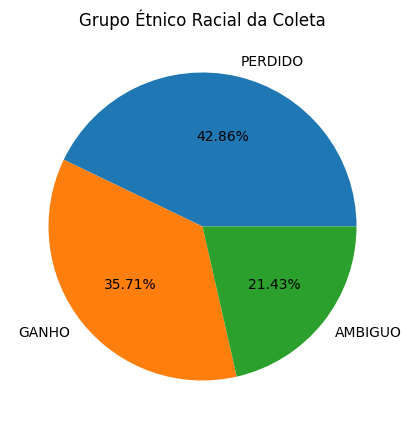

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
ax.pie(labels["count"], labels=labels["Conclusao"], autopct="%.2f%%")
ax.set_title("Grupo Étnico Racial da Coleta")
plt.show()

In [10]:
nltk.download('stopwords')
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def textPreprocessor(featureRecord):
    #Remove punctuations
    removePunctuation = [char for char in featureRecord if char not in string.punctuation]
    sentences =''.join(removePunctuation)

    #convert sentences to words
    words = sentences.split(" ")

    #normalize
    wordNormalized=[word.lower() for word in words]

    #remove stropwords
    finalWords=[word for word in wordNormalized if word not in stopwords.words("portuguese")]

    finalWords = [stemmer.stem(word) for word in finalWords]

    #joined = ' '.join(finalWords)

    return finalWords

In [12]:
!pip3 install spacy
!pip3 install unidecode


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!python3 -m spacy download pt_core_news_sm;

C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe: No module named spacy


In [14]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from unidecode import unidecode

# Download Portuguese stopwords
stop_words = set(stopwords.words('portuguese'))

# Load the spaCy model for Portuguese
nlp = spacy.load("pt_core_news_sm")

def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Retrieve the base form (lemma) of each word and remove punctuation
    lemmatized_words = [token.lemma_ for token in doc if token.text not in string.punctuation]

    # Remove stopwords and newline characters after lemmatization
    filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words and word != '\n']

    # Remove accents from words
    cleaned_words = [unidecode(word) for word in filtered_words]

    # Reconstruct the text without stopwords, punctuation, accents, and newline characters
    preprocessed_text = ' '.join(cleaned_words)

    return preprocessed_text

# Example usage
text = "Estou correndo e pulando, mas com stopwords e \n que precisamos remover."
processed_text = preprocess_text(text)
print(processed_text)

correndo pular stopwords 
  precisar remover


In [15]:
df_sample = df.sample(frac=0.1, random_state=42)

In [16]:
df["Original_Text"] = df["Original_Text"].apply(preprocess_text)

In [17]:
df

,Original_Text,Conclusao
3,Exmo.(a Sr.(a Dr.(a Juiz Direito de o Mm Vara ...,GANHO
4,EXCELENTISSIMO(A SENHOR(A DOUTOR(A JUIZ(A DI...,GANHO
6,Enderecoo andar 30130-008 Belo Horizonte MG ...,PERDIDO
8,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,GANHO
9,EXCELENTISSIMO SENHOR JUIZ de o 1a VARA FEDE...,PERDIDO
11,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de...,PERDIDO
12,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de...,GANHO
15,JUIZO VARAS FEDERAIS de o SUBSECAO JUDICIARI...,AMBIGUO
20,EXCELENTISSIMO SENHOR DR JUIZ de o 2a SEGUND...,AMBIGUO
22,EXCELENTISSIMO SENHOR DOUTOR JUIZ FEDERAL de...,AMBIGUO


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Cor' column
df['Conclusao'] = label_encoder.fit_transform(df['Conclusao'])

# TF - IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer with stop words in Portuguese and using L2 normalization
Tfidf = TfidfVectorizer(norm='l2')

# Transform the text data in the "remainder__Original_Text" column of your DataFrame
X = Tfidf.fit_transform(df["Original_Text"]).toarray()


# Modelo

In [20]:
y = df["Conclusao"].dropna().reset_index()

In [21]:
X

array([[0.08200747, 0.06833956, 0.01366791, ..., 0.        , 0.        ,
        0.01373581],
       [0.08263865, 0.06941647, 0.01983328, ..., 0.        , 0.        ,
        0.        ],
       [0.02126809, 0.00531702, 0.01417873, ..., 0.00534344, 0.00534344,
        0.        ],
       ...,
       [0.07215635, 0.03474195, 0.00801737, ..., 0.        , 0.        ,
        0.        ],
       [0.11360332, 0.03550104, 0.11360332, ..., 0.        , 0.        ,
        0.        ],
       [0.06476551, 0.03238276, 0.0215885 , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
y = y.drop(columns=["index"])

In [23]:
df

,Original_Text,Conclusao
3,Exmo.(a Sr.(a Dr.(a Juiz Direito de o Mm Vara ...,1
4,EXCELENTISSIMO(A SENHOR(A DOUTOR(A JUIZ(A DI...,1
6,Enderecoo andar 30130-008 Belo Horizonte MG ...,2
8,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,1
9,EXCELENTISSIMO SENHOR JUIZ de o 1a VARA FEDE...,2
11,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de...,2
12,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de...,1
15,JUIZO VARAS FEDERAIS de o SUBSECAO JUDICIARI...,0
20,EXCELENTISSIMO SENHOR DR JUIZ de o 2a SEGUND...,0
22,EXCELENTISSIMO SENHOR DOUTOR JUIZ FEDERAL de...,0


In [24]:
df_sample = pd.read_csv("./datasets/Coleta_Negras.csv")

# PCA

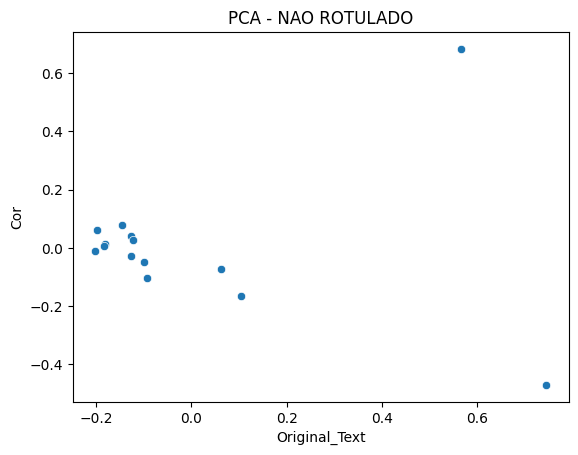

In [25]:
from sklearn.decomposition import PCA
import pandas as pd




pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['Original_Text',"Cor", "Conclusao"])
df_pca = df_pca.dropna(subset=["Conclusao"]).reset_index()



# Visualize the transformed data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Original_Text', y='Cor', data=df_pca)
plt.title('PCA - NAO ROTULADO')
plt.show()

In [26]:
df_pca["Conclusao"]

0    -0.095485
1     0.008832
2    -0.086265
3    -0.084695
4    -0.078746
5    -0.271428
6     0.678708
7    -0.141078
8    -0.044793
9    -0.031860
10    0.314625
11   -0.047487
12    0.011272
13   -0.131600
Name: Conclusao, dtype: float64

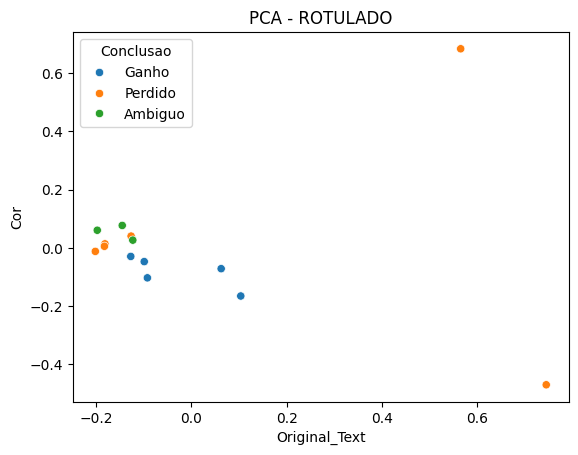

In [27]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd



# Instantiate the PCA model with the desired number of components
# In this example, we set n_components to 2 for 2D visualization
pca = PCA(n_components=3)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization purposes
df_pca = pd.DataFrame(data=X_pca, columns=['Original_Text', "Cor", "Conclusao"])
id_mapping = {0: 'Ambiguo', 1: 'Ganho', 2: "Perdido"}
df_pca['Conclusao'] = y["Conclusao"].map(id_mapping)



# Visualize the transformed data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Original_Text', y='Cor', hue="Conclusao", data=df_pca)
plt.title('PCA - ROTULADO')
plt.show()


In [28]:
df_pca["Conclusao"]

0       Ganho
1       Ganho
2     Perdido
3       Ganho
4     Perdido
5     Perdido
6       Ganho
7     Ambiguo
8     Ambiguo
9     Ambiguo
10      Ganho
11    Perdido
12    Perdido
13    Perdido
Name: Conclusao, dtype: object

In [29]:
from datetime import datetime

# Get the current date and time
current_datetime = datetime.now()

# Format the date and time as a string
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")


In [30]:
from sklearn.model_selection import train_test_split
import numpy as np

# Supondo que y seja seu conjunto de rótulos
y = np.ravel(y)


X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

# Avaliação

In [31]:
#Creating a function to display model results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluation_parametrics(name,y_test, y_pred):
    cm_test = confusion_matrix(y_test, y_pred )
    t1 = ConfusionMatrixDisplay(cm_test, display_labels=["Ambiguo", "Ganho","Perdido"])    
    print("Classification Report for Data Test")
    print(classification_report(y_test, y_pred))
    t1.plot()

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # Replace with your model

# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = LogisticRegression(random_state=42, max_iter=1000, solver="lbfgs", penalty="l2", C=1, tol=0.0001)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.33333333 0.         0.33333333 0.33333333 0.        ]
Mean F1 Score: 0.2


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

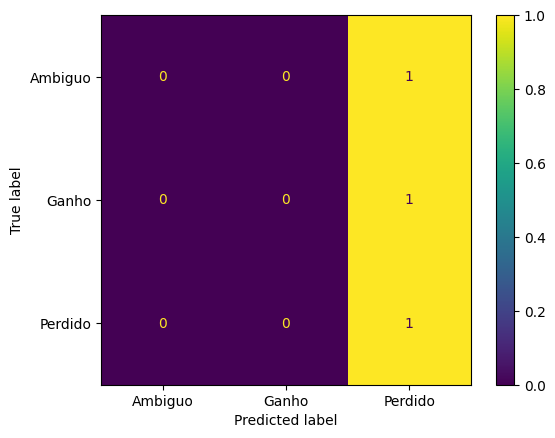

In [33]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

# SGD


In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier  # Replace with your model

# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = SGDClassifier(random_state=42,alpha=0.0001, )

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.33333333 0.33333333 0.         0.33333333 0.        ]
Mean F1 Score: 0.2


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

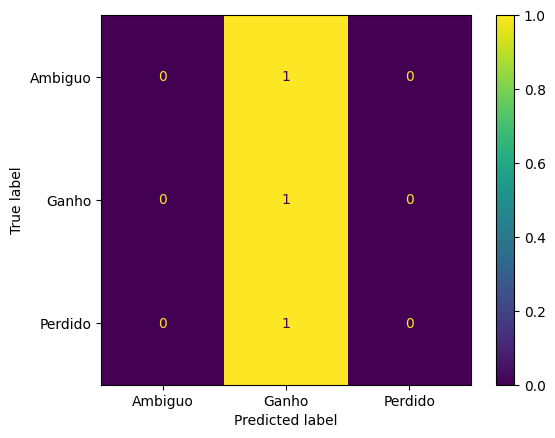

In [35]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

# KNN

In [36]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = KNeighborsClassifier(n_neighbors=1, weights="uniform", algorithm="brute", leaf_size=30, p=2 )  # You can adjust the number of neighbors

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [1.         0.         0.33333333 0.66666667 0.5       ]
Mean F1 Score: 0.5


Classification Report for Data Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



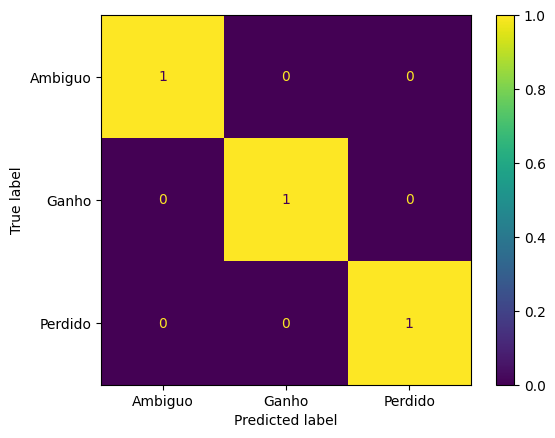

In [37]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

# SVM (SUPORT VECTOR MACHINE)

In [38]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = LinearSVC(penalty="l2", loss='squared_hinge', tol=0.000001, C=10, multi_class='ovr', dual=True)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.66666667 0.         0.66666667 0.66666667 0.        ]
Mean F1 Score: 0.4


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

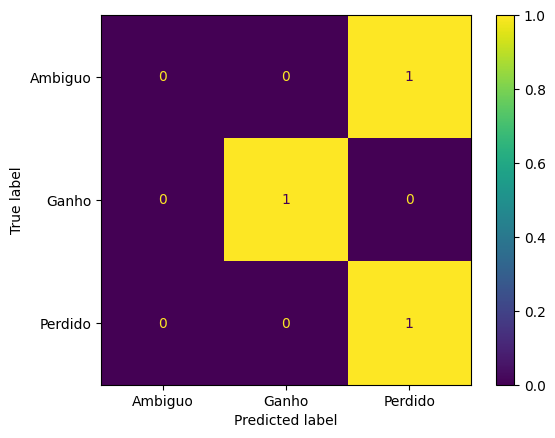

In [39]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

# RANDOM FOREST

In [40]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=None, random_state=42)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())

Cross-Validation Results: [0.33333333 0.         0.66666667 0.33333333 0.        ]
Mean F1 Score: 0.26666666666666666


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

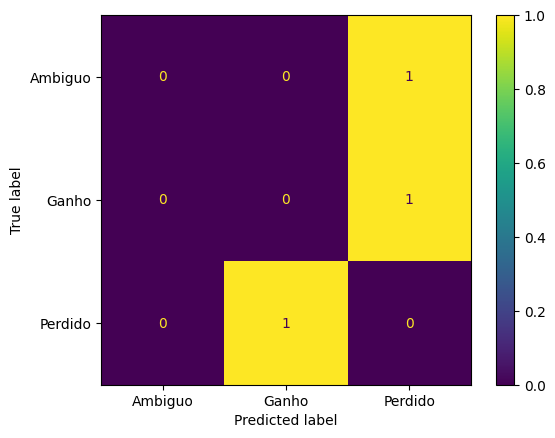

In [41]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

Cross-Validation Results: [0.         0.         0.         0.33333333 0.        ]
Mean F1 Score: 0.06666666666666667


<Figure size 2000x1000 with 0 Axes>

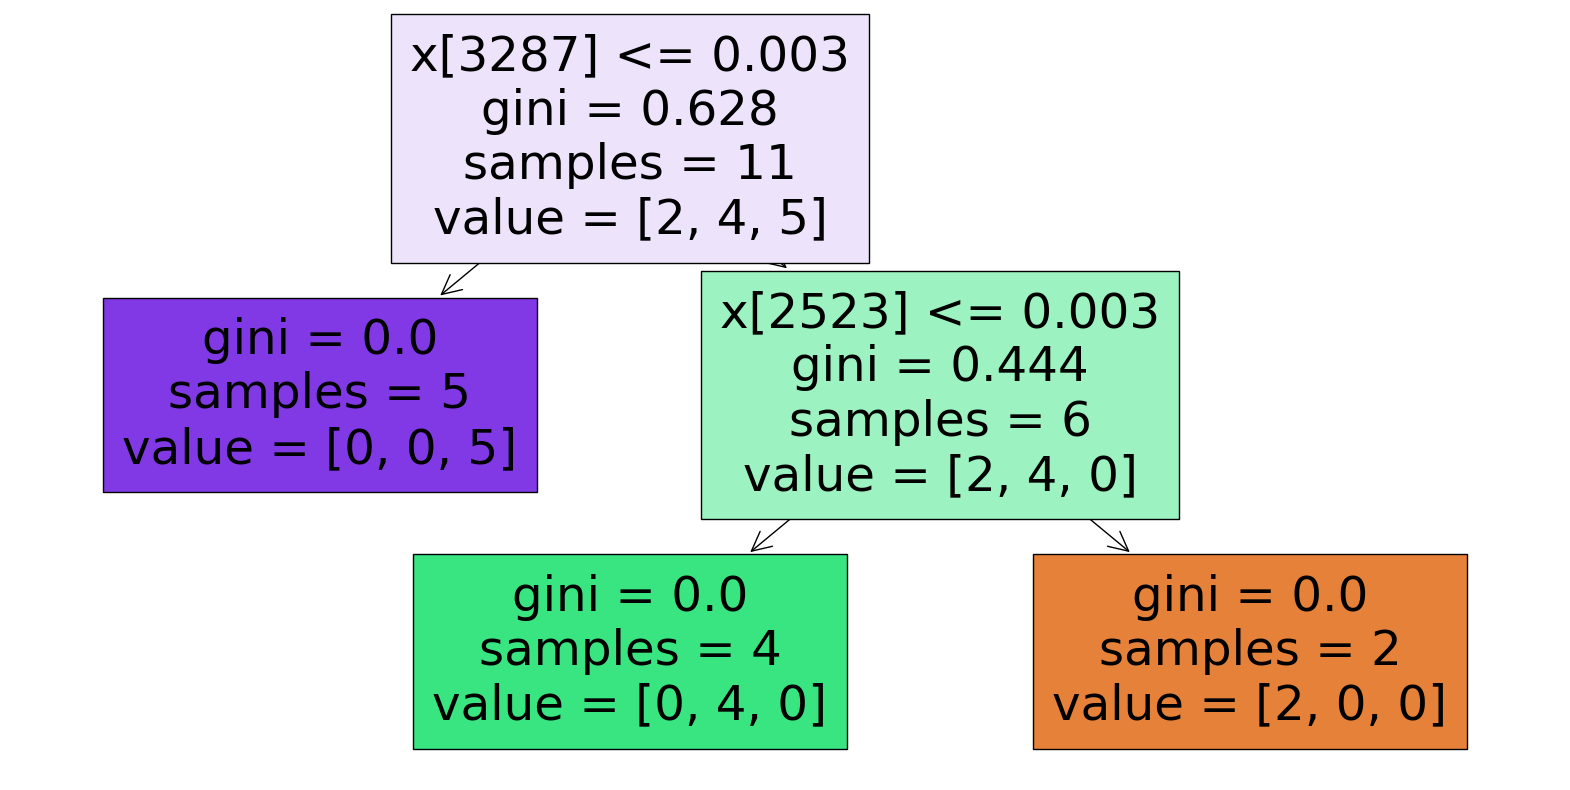

In [42]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds


model = DecisionTreeClassifier(random_state=42)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())

# Criar o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Treinar o classificador
clf.fit(X_train, y_train)

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))  # Ajustar o tamanho da figura conforme necessário
# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))  # Ajustar o tamanho da figura conforme necessário
plot_tree(clf, filled=True)

plt.show()

Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

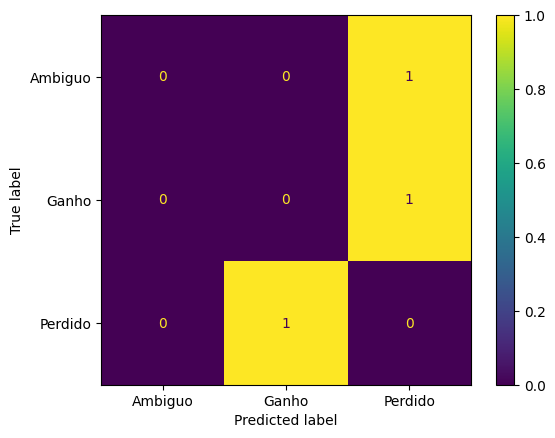

In [43]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)